# Principal Component Analysis

#### Seoul Bike Sharing Demand

##### Predict demand for shared bikes in Seoul based on various environmental factors

#### About Dataset
##### Data Description:
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

In [33]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [136]:
# Loading the Dataset
df = pd.read_csv('./SeoulBikeData.csv', encoding='ISO-8859-1')
df = pd.DataFrame(df)
df.shape

(8760, 14)

In [137]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Since we have 3 catagorical features, we'll drop those features

In [138]:
df01 = df.drop(["Date","Seasons", "Holiday", "Functioning Day"], axis=1)

In [139]:
df01.shape

(8760, 10)

In [140]:
df01.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


##### Dropping the Respose Variable from the dataset (Fearure: Rented Bike Count)

In [141]:
print(df01.columns)

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')


In [142]:
df01 = df01.drop("Rented Bike Count", axis=1)

In [143]:
df01.shape

(8760, 9)

Now, we are left with the following 10 features.

In [144]:
df01.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

#### Scaling Features 
don’t forget to center the data first.

In [145]:
scale = StandardScaler()
scaled_data = scale.fit_transform(df01)
scaled_data

array([[-1.66132477, -1.51395724, -1.04248288, ..., -0.65513172,
        -0.13179988, -0.17189109],
       [-1.51686175, -1.53907415, -0.99336999, ..., -0.65513172,
        -0.13179988, -0.17189109],
       [-1.37239873, -1.58093567, -0.94425709, ..., -0.65513172,
        -0.13179988, -0.17189109],
       ...,
       [ 1.37239873, -0.86091752, -0.94425709, ..., -0.65513172,
        -0.13179988, -0.17189109],
       [ 1.51686175, -0.90277904, -0.8460313 , ..., -0.65513172,
        -0.13179988, -0.17189109],
       [ 1.66132477, -0.91952365, -0.74780551, ..., -0.65513172,
        -0.13179988, -0.17189109]])

In [146]:
scaled_data = pd.DataFrame(scaled_data, columns=df01.columns)
scaled_data.head(5)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891


#### Splitting the dataset into train and test


In [147]:
Y = df['Rented Bike Count']
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,Y,test_size=0.3,random_state=123)
print("No of Obs in Original DataFrame", df.shape)
print("No of Obs in Training Set", X_train.shape, "\n","No of Obs in test Set", X_test.shape)

No of Obs in Original DataFrame (8760, 14)
No of Obs in Training Set (6132, 9) 
 No of Obs in test Set (2628, 9)


In [148]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
pca_model = pca.fit(X_train)
pca_model = pca.fit_transform(X_train)

In [149]:
pca_model

array([[-0.48560724, -1.38088822,  0.16151145, ..., -0.46652578,
        -0.49457087,  0.08170704],
       [ 1.21845824,  0.05906488, -0.71614756, ...,  0.78587568,
         0.49419495,  0.01619515],
       [-2.19435494, -1.73953926,  1.11615528, ...,  0.80695561,
         0.47427133, -0.07025938],
       ...,
       [ 0.26418384, -1.24213913, -0.62721668, ...,  0.38499557,
        -0.15303446,  0.03790587],
       [-2.69156892,  2.94610755, -0.16091829, ...,  0.5400876 ,
         0.20200789,  0.03354639],
       [ 0.6173541 ,  0.89350376, -0.69288418, ...,  0.00450308,
         0.09055378,  0.01509603]])

In [150]:
var_00 = pca.explained_variance_ratio_
var_00

array([0.27116821, 0.22393425, 0.12938487, 0.10777274, 0.09295767,
       0.08508128, 0.0662244 , 0.02298608, 0.0004905 ])

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

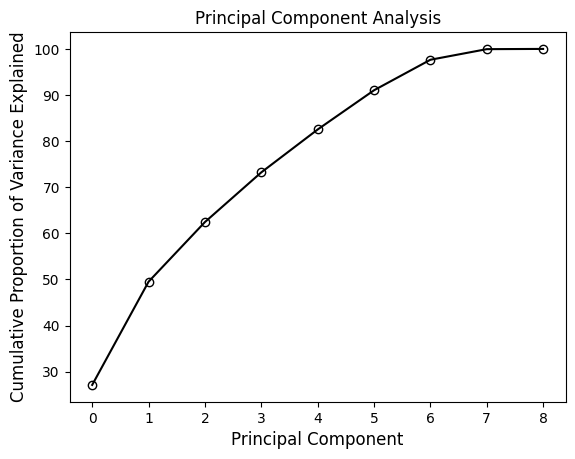

In [151]:
cumulative_var = np.cumsum(np.round(var_00, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)

## Alternate way of finding the desired number of Principal Components

Instead of specifying the number of components, we can provide the explained varience e,g., 0.90 and then fit the PCA model to find those variables that will explain 90% of the variation in the target variable.

In [152]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

In [157]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)

In [158]:
var = pca.explained_variance_ratio_
var

array([0.27116821, 0.22393425, 0.12938487, 0.10777274, 0.09295767,
       0.08508128])

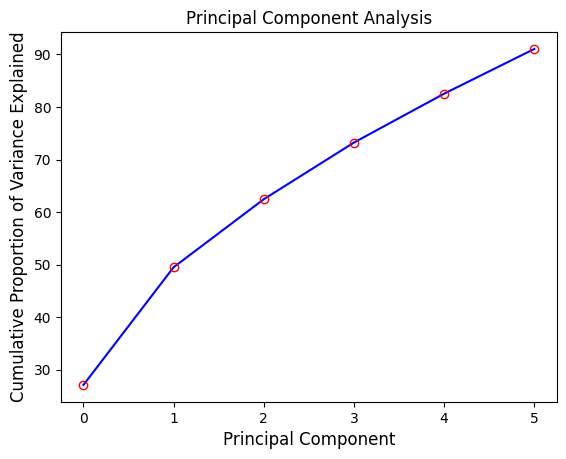

In [159]:
cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
line_color = 'blue'
marker_edge_color = 'red'

plt.plot(cumulative_var, color=line_color, linestyle='-', marker='o', markerfacecolor='None', markeredgecolor=marker_edge_color)
plt.title('Principal Component Analysis', fontsize=12)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained", fontsize=12)

# Show the plot
plt.show()

In [166]:
X_reduced = pd.DataFrame(X_reduced,columns=['PC_' + str(i) for i in range(1, 7)])
X_reduced.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,-0.485607,-1.380888,0.161511,-0.526482,1.271472,-0.771035
1,1.218458,0.059065,-0.716148,0.131987,0.460618,-0.173914
2,-2.194355,-1.739539,1.116155,-0.482956,0.275921,-0.695293
3,1.526484,0.197914,1.365953,-1.335402,-0.635778,-1.959636
4,-1.559430,-2.164040,0.433626,-0.282276,0.621742,-0.075741


In [168]:
Y_train1 = Y_train.reset_index()

X_reduced1 = pd.concat([X_reduced,Y_train1],axis=1)
X_reduced2 = X_reduced1.drop(columns='index')
X_reduced3 = X_reduced1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6','Rented Bike Count']]
X_reduced3.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,Rented Bike Count
0,-0.485607,-1.380888,0.161511,-0.526482,1.271472,-0.771035,0
1,1.218458,0.059065,-0.716148,0.131987,0.460618,-0.173914,562
2,-2.194355,-1.739539,1.116155,-0.482956,0.275921,-0.695293,1632
3,1.526484,0.197914,1.365953,-1.335402,-0.635778,-1.959636,329
4,-1.559430,-2.164040,0.433626,-0.282276,0.621742,-0.075741,1025
